# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

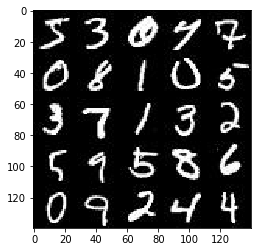

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

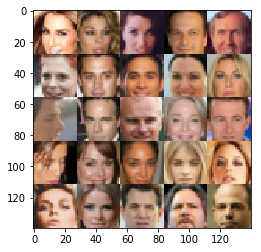

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0


C:\Users\jrgomez\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.
  


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real = tf.placeholder(tf.float32, [None, image_width, image_height, image_channels], name='input_real')
    inputs_z = tf.placeholder(tf.float32, [None, z_dim], name='input_z')
    lr = tf.placeholder(tf.float32, name='lr')

    return inputs_real, inputs_z, lr


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        x1 = tf.layers.conv2d(images, 32, 5, strides=2, padding='same')
        relu1 = tf.maximum(0.2*x1, x1)
        ## 14x14x32
        
        x2 = tf.layers.conv2d(relu1, 64, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(0.2*bn2,bn2)
        ## 7x7x64
        
        x3 = tf.layers.conv2d(relu2, 128, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(0.2*bn3, bn3)
        #print(relu3.shape)
        
        flat = tf.reshape(relu3, (-1, 4*4*128))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        

    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    ## no reuse parameter, then Not is_train
    with tf.variable_scope('generator', reuse=not is_train):
        
        #first fully connected
        x1 = tf.layers.dense(z, 2*2*128)
        
        x1 = tf.reshape(x1, (-1, 2, 2, 128))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(0.2*x1,x1)
        
        ##print(x1.shape)
        
        #same padding  4x4
        #valid padding 7x7
        x2 = tf.layers.conv2d_transpose(x1, 64,5,strides=2, padding='valid')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(0.2*x2, x2)
        ##print(x2.shape)
        
        x3 = tf.layers.conv2d_transpose(x2, 32, 4, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(0.2*x3, x3)
        ##print(x3.shape)
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 4, strides=2, padding='same')
        
        out = tf.tanh(logits)
        ##print(out.shape)
    
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    d_loss_real = tf.reduce_mean( tf.nn.sigmoid_cross_entropy_with_logits( logits = d_logits_real,
                                                                           labels = tf.ones_like(d_model_real)
                                                                         )
                                )
    d_loss_fake = tf.reduce_mean( tf.nn.sigmoid_cross_entropy_with_logits( logits= d_logits_fake,
                                                                           labels = tf.zeros_like(d_model_fake)
                                                                         )
                                )
    g_loss = tf.reduce_mean( tf.nn.sigmoid_cross_entropy_with_logits( logits = d_logits_fake,
                                                                      labels= tf.ones_like(d_model_fake)
                                                                    )
                           )
    
    d_loss = d_loss_real + d_loss_fake
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    ##saver = tf.train.Saver()
    sample_z = np.random.uniform(-1, 1, size=(72, z_dim))
    
    samples, losses = [], []
    steps = 0
    
    print_every = 10
    show_every = 100
    
    ##-----Model Inputs-----##
    inputs_real, inputs_z, lrt = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    ##-----Model Loss-------##
    d_loss, g_loss = model_loss(inputs_real, inputs_z, data_shape[3])
    ##-----Model Opt--------##
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                steps += 1
                
                #noise
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                #optimizers
                _ = sess.run(d_train_opt, feed_dict={inputs_real:batch_images ,inputs_z: batch_z, lrt:learning_rate})
                _ = sess.run(g_train_opt, feed_dict={inputs_z:batch_z, inputs_real:batch_images, lrt:learning_rate})
                
                if steps%print_every == 0:
                    train_loss_d = d_loss.eval({inputs_z:batch_z, inputs_real:batch_images})
                    train_loss_g = g_loss.eval({inputs_z:batch_z})
                    
                    print("Epoch {}/{}...".format(epoch_i + 1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    losses.append((train_loss_d, train_loss_g))
                    
                if steps%show_every == 0:
                    show_generator_output(sess, 12, inputs_z, data_shape[3], data_image_mode)
                    
                    '''
            saver.save(sess, './checkpoints/generator.ckpt')
        with open('samples.pkl', 'wb') as f:
            pkl.dump(samples, f)        
                    '''
                    
            
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.1506... Generator Loss: 2.4494
Epoch 1/2... Discriminator Loss: 0.0939... Generator Loss: 2.9797
Epoch 1/2... Discriminator Loss: 0.0586... Generator Loss: 3.3372
Epoch 1/2... Discriminator Loss: 0.0663... Generator Loss: 3.2887
Epoch 1/2... Discriminator Loss: 0.0560... Generator Loss: 3.4136
Epoch 1/2... Discriminator Loss: 0.0578... Generator Loss: 3.5084
Epoch 1/2... Discriminator Loss: 0.0530... Generator Loss: 3.6076
Epoch 1/2... Discriminator Loss: 0.0443... Generator Loss: 3.7976
Epoch 1/2... Discriminator Loss: 0.0474... Generator Loss: 3.7072
Epoch 1/2... Discriminator Loss: 0.0955... Generator Loss: 3.1608


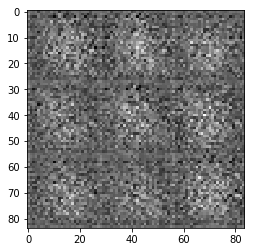

Epoch 1/2... Discriminator Loss: 0.0838... Generator Loss: 3.1622
Epoch 1/2... Discriminator Loss: 0.0737... Generator Loss: 4.0197
Epoch 1/2... Discriminator Loss: 0.0712... Generator Loss: 3.7313
Epoch 1/2... Discriminator Loss: 0.0687... Generator Loss: 3.7118
Epoch 1/2... Discriminator Loss: 0.3135... Generator Loss: 1.5878
Epoch 1/2... Discriminator Loss: 0.5495... Generator Loss: 1.1496
Epoch 1/2... Discriminator Loss: 0.2391... Generator Loss: 2.4596
Epoch 1/2... Discriminator Loss: 0.3326... Generator Loss: 1.5962
Epoch 1/2... Discriminator Loss: 0.2187... Generator Loss: 2.4157
Epoch 1/2... Discriminator Loss: 0.0661... Generator Loss: 4.0944


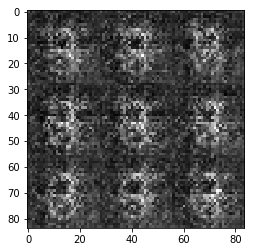

Epoch 1/2... Discriminator Loss: 0.1454... Generator Loss: 2.5708
Epoch 1/2... Discriminator Loss: 0.0530... Generator Loss: 4.0767
Epoch 1/2... Discriminator Loss: 0.0807... Generator Loss: 3.5228
Epoch 1/2... Discriminator Loss: 0.0406... Generator Loss: 4.4576
Epoch 1/2... Discriminator Loss: 0.0564... Generator Loss: 4.3340
Epoch 1/2... Discriminator Loss: 0.0499... Generator Loss: 3.9122
Epoch 1/2... Discriminator Loss: 0.0280... Generator Loss: 4.3077
Epoch 1/2... Discriminator Loss: 0.0356... Generator Loss: 4.4777
Epoch 1/2... Discriminator Loss: 0.0330... Generator Loss: 4.2902
Epoch 1/2... Discriminator Loss: 0.0458... Generator Loss: 4.0970


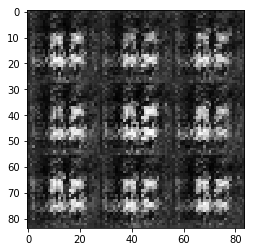

Epoch 1/2... Discriminator Loss: 0.0394... Generator Loss: 4.2216
Epoch 1/2... Discriminator Loss: 0.0324... Generator Loss: 4.2747
Epoch 1/2... Discriminator Loss: 0.0327... Generator Loss: 4.3886
Epoch 1/2... Discriminator Loss: 0.0660... Generator Loss: 3.4383
Epoch 1/2... Discriminator Loss: 0.0232... Generator Loss: 4.9456
Epoch 1/2... Discriminator Loss: 0.0300... Generator Loss: 4.5302
Epoch 1/2... Discriminator Loss: 0.0305... Generator Loss: 4.5839
Epoch 1/2... Discriminator Loss: 0.0143... Generator Loss: 5.5165
Epoch 1/2... Discriminator Loss: 0.0295... Generator Loss: 4.6685
Epoch 1/2... Discriminator Loss: 0.0458... Generator Loss: 4.1131


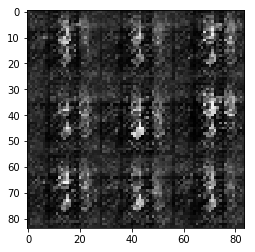

Epoch 1/2... Discriminator Loss: 0.0367... Generator Loss: 4.1345
Epoch 1/2... Discriminator Loss: 0.0425... Generator Loss: 4.1136
Epoch 1/2... Discriminator Loss: 0.0512... Generator Loss: 3.7081
Epoch 1/2... Discriminator Loss: 0.0324... Generator Loss: 6.1703
Epoch 1/2... Discriminator Loss: 0.1834... Generator Loss: 2.5232
Epoch 1/2... Discriminator Loss: 0.0638... Generator Loss: 4.8319
Epoch 1/2... Discriminator Loss: 0.0234... Generator Loss: 4.9130
Epoch 1/2... Discriminator Loss: 0.0541... Generator Loss: 4.5984
Epoch 1/2... Discriminator Loss: 0.0499... Generator Loss: 4.3205
Epoch 1/2... Discriminator Loss: 0.0413... Generator Loss: 4.7889


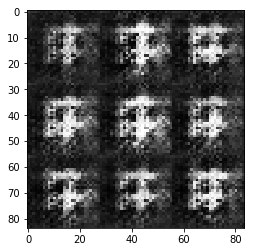

Epoch 1/2... Discriminator Loss: 0.0366... Generator Loss: 4.4511
Epoch 1/2... Discriminator Loss: 0.0589... Generator Loss: 4.7707
Epoch 1/2... Discriminator Loss: 0.0394... Generator Loss: 5.4087
Epoch 1/2... Discriminator Loss: 0.0401... Generator Loss: 4.6487
Epoch 1/2... Discriminator Loss: 0.0477... Generator Loss: 4.0428
Epoch 1/2... Discriminator Loss: 0.0353... Generator Loss: 4.4950
Epoch 1/2... Discriminator Loss: 0.0540... Generator Loss: 3.9502
Epoch 1/2... Discriminator Loss: 0.0479... Generator Loss: 4.5527
Epoch 1/2... Discriminator Loss: 0.0505... Generator Loss: 4.6606
Epoch 1/2... Discriminator Loss: 0.0327... Generator Loss: 4.7400


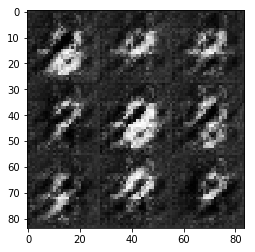

Epoch 1/2... Discriminator Loss: 0.0374... Generator Loss: 4.1984
Epoch 1/2... Discriminator Loss: 0.0203... Generator Loss: 5.4204
Epoch 1/2... Discriminator Loss: 0.0340... Generator Loss: 4.4774
Epoch 1/2... Discriminator Loss: 0.0554... Generator Loss: 4.6731
Epoch 1/2... Discriminator Loss: 0.0742... Generator Loss: 3.7306
Epoch 1/2... Discriminator Loss: 0.0868... Generator Loss: 3.7637
Epoch 1/2... Discriminator Loss: 0.0529... Generator Loss: 4.2515
Epoch 1/2... Discriminator Loss: 0.1545... Generator Loss: 5.3188
Epoch 1/2... Discriminator Loss: 0.0363... Generator Loss: 4.6344
Epoch 1/2... Discriminator Loss: 0.0365... Generator Loss: 4.8514


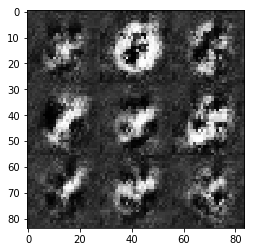

Epoch 1/2... Discriminator Loss: 0.0392... Generator Loss: 4.3973
Epoch 1/2... Discriminator Loss: 0.0430... Generator Loss: 4.3025
Epoch 1/2... Discriminator Loss: 0.1508... Generator Loss: 5.7684
Epoch 1/2... Discriminator Loss: 0.1137... Generator Loss: 4.2122
Epoch 1/2... Discriminator Loss: 0.1136... Generator Loss: 3.6385
Epoch 1/2... Discriminator Loss: 0.0644... Generator Loss: 3.9707
Epoch 1/2... Discriminator Loss: 0.0567... Generator Loss: 4.1612
Epoch 1/2... Discriminator Loss: 0.1204... Generator Loss: 2.9120
Epoch 1/2... Discriminator Loss: 0.0685... Generator Loss: 3.6421
Epoch 1/2... Discriminator Loss: 0.0473... Generator Loss: 4.4525


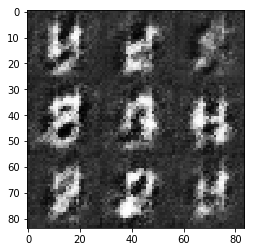

Epoch 1/2... Discriminator Loss: 0.0427... Generator Loss: 4.4287
Epoch 1/2... Discriminator Loss: 0.0593... Generator Loss: 4.1026
Epoch 1/2... Discriminator Loss: 0.0635... Generator Loss: 4.7891
Epoch 1/2... Discriminator Loss: 0.1051... Generator Loss: 5.7331
Epoch 1/2... Discriminator Loss: 0.0633... Generator Loss: 4.2093
Epoch 1/2... Discriminator Loss: 0.6636... Generator Loss: 1.1817
Epoch 1/2... Discriminator Loss: 0.2057... Generator Loss: 2.4314
Epoch 1/2... Discriminator Loss: 0.0939... Generator Loss: 3.5334
Epoch 1/2... Discriminator Loss: 0.1045... Generator Loss: 2.9884
Epoch 1/2... Discriminator Loss: 0.0547... Generator Loss: 3.9888


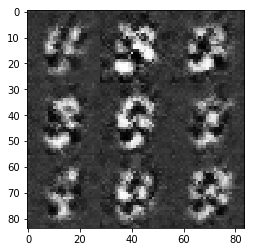

Epoch 1/2... Discriminator Loss: 0.0466... Generator Loss: 3.9741
Epoch 1/2... Discriminator Loss: 0.0445... Generator Loss: 4.0969
Epoch 1/2... Discriminator Loss: 0.0789... Generator Loss: 3.7095
Epoch 2/2... Discriminator Loss: 0.0965... Generator Loss: 3.1696
Epoch 2/2... Discriminator Loss: 0.1015... Generator Loss: 3.2623
Epoch 2/2... Discriminator Loss: 0.0700... Generator Loss: 3.6260
Epoch 2/2... Discriminator Loss: 0.1012... Generator Loss: 3.7229
Epoch 2/2... Discriminator Loss: 0.2371... Generator Loss: 2.3599
Epoch 2/2... Discriminator Loss: 0.1938... Generator Loss: 2.8616
Epoch 2/2... Discriminator Loss: 0.1654... Generator Loss: 2.4218


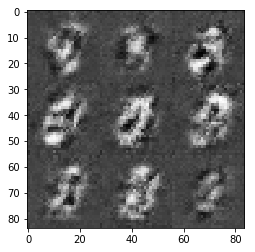

Epoch 2/2... Discriminator Loss: 0.1357... Generator Loss: 2.9660
Epoch 2/2... Discriminator Loss: 0.1162... Generator Loss: 3.2206
Epoch 2/2... Discriminator Loss: 0.2374... Generator Loss: 1.9742
Epoch 2/2... Discriminator Loss: 0.1946... Generator Loss: 4.0927
Epoch 2/2... Discriminator Loss: 0.0955... Generator Loss: 3.0985
Epoch 2/2... Discriminator Loss: 0.1051... Generator Loss: 3.7420
Epoch 2/2... Discriminator Loss: 0.9003... Generator Loss: 0.6972
Epoch 2/2... Discriminator Loss: 0.0903... Generator Loss: 3.5150
Epoch 2/2... Discriminator Loss: 0.0494... Generator Loss: 4.0692
Epoch 2/2... Discriminator Loss: 0.0904... Generator Loss: 3.9999


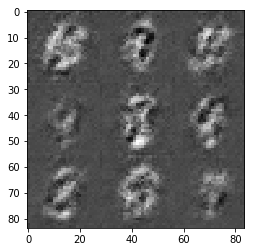

Epoch 2/2... Discriminator Loss: 0.0587... Generator Loss: 4.0120
Epoch 2/2... Discriminator Loss: 0.0828... Generator Loss: 3.2349
Epoch 2/2... Discriminator Loss: 0.0471... Generator Loss: 4.6098
Epoch 2/2... Discriminator Loss: 0.0508... Generator Loss: 4.3839
Epoch 2/2... Discriminator Loss: 0.0300... Generator Loss: 4.9871
Epoch 2/2... Discriminator Loss: 0.0572... Generator Loss: 4.2500
Epoch 2/2... Discriminator Loss: 0.0493... Generator Loss: 4.3307
Epoch 2/2... Discriminator Loss: 0.0467... Generator Loss: 4.5190
Epoch 2/2... Discriminator Loss: 0.0381... Generator Loss: 4.3452
Epoch 2/2... Discriminator Loss: 0.0491... Generator Loss: 4.2995


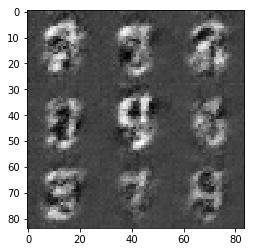

Epoch 2/2... Discriminator Loss: 0.0601... Generator Loss: 4.1120
Epoch 2/2... Discriminator Loss: 0.0648... Generator Loss: 3.5371
Epoch 2/2... Discriminator Loss: 0.0836... Generator Loss: 3.2960
Epoch 2/2... Discriminator Loss: 0.0565... Generator Loss: 3.8977
Epoch 2/2... Discriminator Loss: 0.0551... Generator Loss: 4.1638
Epoch 2/2... Discriminator Loss: 0.0562... Generator Loss: 4.2116
Epoch 2/2... Discriminator Loss: 0.1811... Generator Loss: 2.2046
Epoch 2/2... Discriminator Loss: 0.0384... Generator Loss: 4.3948
Epoch 2/2... Discriminator Loss: 0.0473... Generator Loss: 4.1249
Epoch 2/2... Discriminator Loss: 0.0864... Generator Loss: 3.2049


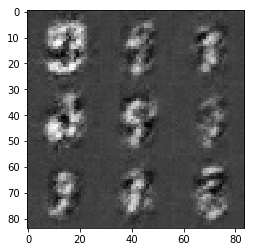

Epoch 2/2... Discriminator Loss: 0.0708... Generator Loss: 3.6130
Epoch 2/2... Discriminator Loss: 0.0640... Generator Loss: 3.5241
Epoch 2/2... Discriminator Loss: 0.0392... Generator Loss: 4.7066
Epoch 2/2... Discriminator Loss: 0.0384... Generator Loss: 4.8294
Epoch 2/2... Discriminator Loss: 0.0463... Generator Loss: 4.0244
Epoch 2/2... Discriminator Loss: 0.0495... Generator Loss: 4.0962
Epoch 2/2... Discriminator Loss: 0.0407... Generator Loss: 4.4320
Epoch 2/2... Discriminator Loss: 0.0511... Generator Loss: 4.4368
Epoch 2/2... Discriminator Loss: 0.0429... Generator Loss: 4.8948
Epoch 2/2... Discriminator Loss: 0.3871... Generator Loss: 2.0947


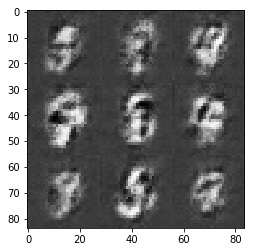

Epoch 2/2... Discriminator Loss: 0.0948... Generator Loss: 3.6358
Epoch 2/2... Discriminator Loss: 0.0599... Generator Loss: 3.8841
Epoch 2/2... Discriminator Loss: 0.0762... Generator Loss: 3.6326
Epoch 2/2... Discriminator Loss: 0.0635... Generator Loss: 3.9317
Epoch 2/2... Discriminator Loss: 0.0591... Generator Loss: 4.3212
Epoch 2/2... Discriminator Loss: 0.0465... Generator Loss: 4.3871
Epoch 2/2... Discriminator Loss: 0.0467... Generator Loss: 4.5518
Epoch 2/2... Discriminator Loss: 0.0616... Generator Loss: 4.0100
Epoch 2/2... Discriminator Loss: 0.0497... Generator Loss: 4.2478
Epoch 2/2... Discriminator Loss: 0.0411... Generator Loss: 4.8953


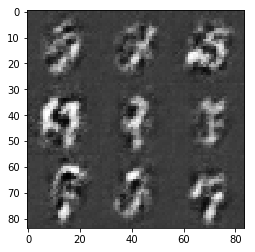

Epoch 2/2... Discriminator Loss: 0.0429... Generator Loss: 4.3608
Epoch 2/2... Discriminator Loss: 0.0384... Generator Loss: 4.5420
Epoch 2/2... Discriminator Loss: 0.0425... Generator Loss: 4.2571
Epoch 2/2... Discriminator Loss: 0.0250... Generator Loss: 4.6542
Epoch 2/2... Discriminator Loss: 0.0564... Generator Loss: 3.9331
Epoch 2/2... Discriminator Loss: 0.0409... Generator Loss: 4.5230
Epoch 2/2... Discriminator Loss: 0.0299... Generator Loss: 4.4396
Epoch 2/2... Discriminator Loss: 0.0535... Generator Loss: 3.8519
Epoch 2/2... Discriminator Loss: 0.0468... Generator Loss: 4.2127
Epoch 2/2... Discriminator Loss: 0.0546... Generator Loss: 4.7806


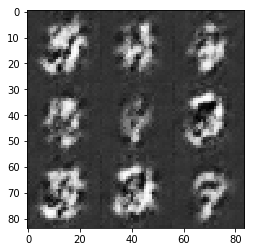

Epoch 2/2... Discriminator Loss: 0.0473... Generator Loss: 4.3129
Epoch 2/2... Discriminator Loss: 0.0267... Generator Loss: 4.6304
Epoch 2/2... Discriminator Loss: 0.0197... Generator Loss: 4.8896
Epoch 2/2... Discriminator Loss: 0.0442... Generator Loss: 3.6621
Epoch 2/2... Discriminator Loss: 0.0391... Generator Loss: 4.0280
Epoch 2/2... Discriminator Loss: 0.0402... Generator Loss: 4.3331
Epoch 2/2... Discriminator Loss: 0.0320... Generator Loss: 4.4314
Epoch 2/2... Discriminator Loss: 0.0389... Generator Loss: 3.9242
Epoch 2/2... Discriminator Loss: 0.0188... Generator Loss: 5.4587
Epoch 2/2... Discriminator Loss: 0.0407... Generator Loss: 4.2721


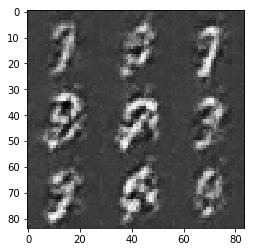

Epoch 2/2... Discriminator Loss: 0.0576... Generator Loss: 3.8425
Epoch 2/2... Discriminator Loss: 0.0272... Generator Loss: 4.7241
Epoch 2/2... Discriminator Loss: 0.0497... Generator Loss: 3.9729
Epoch 2/2... Discriminator Loss: 0.0757... Generator Loss: 3.2664
Epoch 2/2... Discriminator Loss: 0.0369... Generator Loss: 4.2161
Epoch 2/2... Discriminator Loss: 0.0497... Generator Loss: 4.7744
Epoch 2/2... Discriminator Loss: 0.0214... Generator Loss: 4.8450
Epoch 2/2... Discriminator Loss: 0.0396... Generator Loss: 4.1096
Epoch 2/2... Discriminator Loss: 0.0439... Generator Loss: 4.4846
Epoch 2/2... Discriminator Loss: 0.0418... Generator Loss: 4.3876


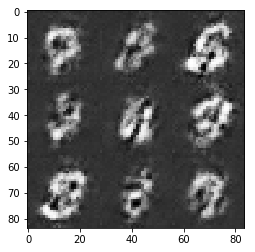

Epoch 2/2... Discriminator Loss: 0.0570... Generator Loss: 3.7825
Epoch 2/2... Discriminator Loss: 0.0286... Generator Loss: 4.6241
Epoch 2/2... Discriminator Loss: 0.0162... Generator Loss: 5.1432
Epoch 2/2... Discriminator Loss: 0.0448... Generator Loss: 4.2087
Epoch 2/2... Discriminator Loss: 9.5550... Generator Loss: 17.6458
Epoch 2/2... Discriminator Loss: 0.0882... Generator Loss: 3.8362
Epoch 2/2... Discriminator Loss: 0.1176... Generator Loss: 3.3139


In [12]:
batch_size = 64
z_dim = 100
learning_rate = 0.0001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

In [ ]:
batch_size = 64
z_dim = None
learning_rate = None
beta1 = None


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.